In [1]:
n = 100 #Number of samples
h = 20 #number ofhidden states
e = 20 #number of epochs

Epoch 1/20
4/4 [==============================] - 3s 16ms/step - loss: 97.1822
Epoch 2/20
4/4 [==============================] - 0s 16ms/step - loss: 93.1292
Epoch 3/20
4/4 [==============================] - 0s 16ms/step - loss: 89.2488
Epoch 4/20
4/4 [==============================] - 0s 13ms/step - loss: 85.2318
Epoch 5/20
4/4 [==============================] - 0s 13ms/step - loss: 81.0564
Epoch 6/20
4/4 [==============================] - 0s 19ms/step - loss: 76.9469
Epoch 7/20
4/4 [==============================] - 0s 12ms/step - loss: 72.7253
Epoch 8/20
4/4 [==============================] - 0s 13ms/step - loss: 68.5757
Epoch 9/20
4/4 [==============================] - 0s 12ms/step - loss: 64.4554
Epoch 10/20
4/4 [==============================] - 0s 19ms/step - loss: 60.5115
Epoch 11/20
4/4 [==============================] - 0s 22ms/step - loss: 56.7899
Epoch 12/20
4/4 [==============================] - 0s 17ms/step - loss: 53.2648
Epoch 13/20
4/4 [==============================] 

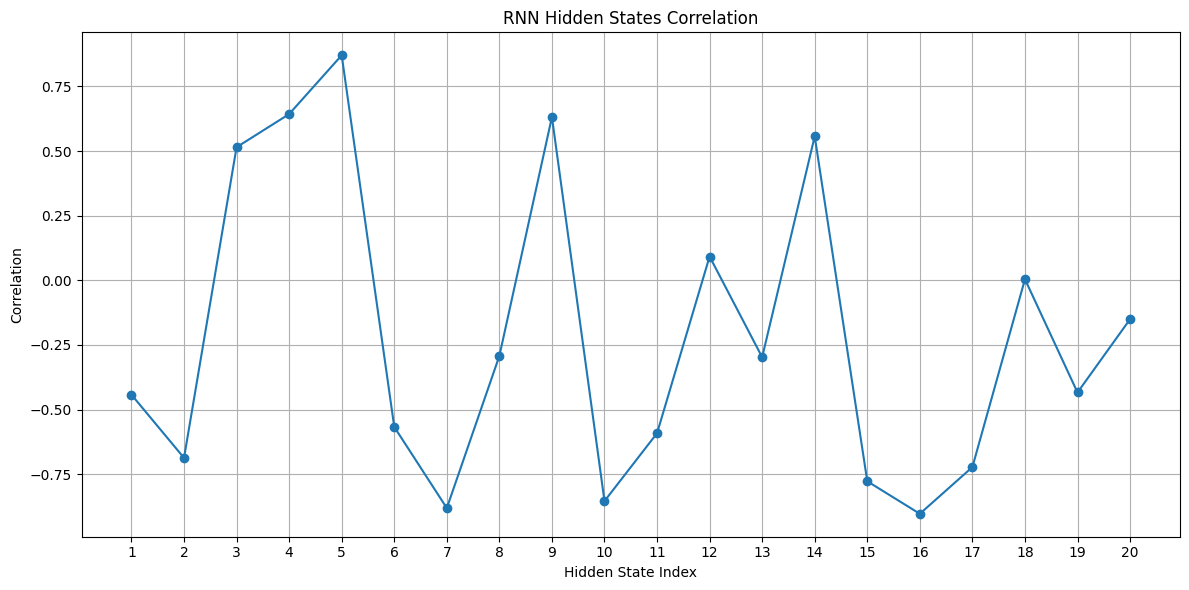


LSTM Hidden States (Hidden_h) Correlation:
LSTM Hidden States (Hidden_h) Correlation - Hidden State 1: 0.9309529341789692
LSTM Hidden States (Hidden_h) Correlation - Hidden State 2: 0.8890381387312636
LSTM Hidden States (Hidden_h) Correlation - Hidden State 3: 0.8881032015773266
LSTM Hidden States (Hidden_h) Correlation - Hidden State 4: 0.7856068023800161
LSTM Hidden States (Hidden_h) Correlation - Hidden State 5: -0.9497946360104333
LSTM Hidden States (Hidden_h) Correlation - Hidden State 6: 0.8855562697061675
LSTM Hidden States (Hidden_h) Correlation - Hidden State 7: -0.8800504843737743
LSTM Hidden States (Hidden_h) Correlation - Hidden State 8: 0.8652054412996836
LSTM Hidden States (Hidden_h) Correlation - Hidden State 9: 0.31083954808700276
LSTM Hidden States (Hidden_h) Correlation - Hidden State 10: 0.8321467102467498
LSTM Hidden States (Hidden_h) Correlation - Hidden State 11: 0.4841441495244003
LSTM Hidden States (Hidden_h) Correlation - Hidden State 12: 0.9146150395670255
LS

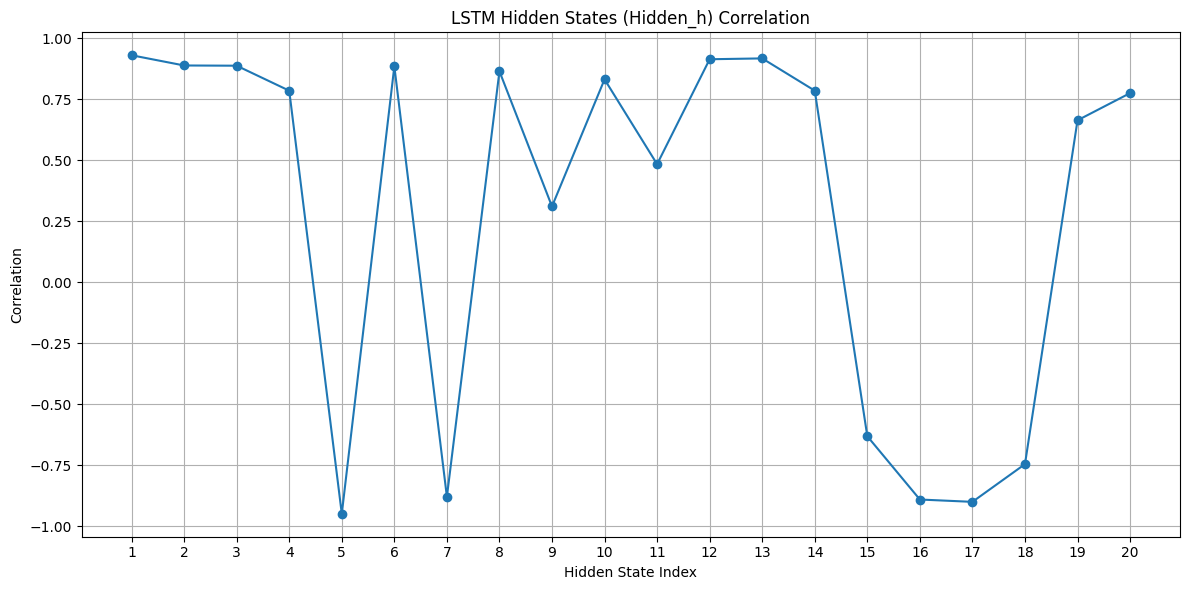


LSTM Hidden States (Hidden_c) Correlation:
LSTM Hidden States (Hidden_c) Correlation - Hidden State 1: 0.9243691869435324
LSTM Hidden States (Hidden_c) Correlation - Hidden State 2: 0.9045669615784607
LSTM Hidden States (Hidden_c) Correlation - Hidden State 3: 0.8493950868011422
LSTM Hidden States (Hidden_c) Correlation - Hidden State 4: 0.7649880413295738
LSTM Hidden States (Hidden_c) Correlation - Hidden State 5: -0.9572770716624731
LSTM Hidden States (Hidden_c) Correlation - Hidden State 6: 0.8836273717961919
LSTM Hidden States (Hidden_c) Correlation - Hidden State 7: -0.8704812880930046
LSTM Hidden States (Hidden_c) Correlation - Hidden State 8: 0.8592735009263941
LSTM Hidden States (Hidden_c) Correlation - Hidden State 9: 0.3042195151275326
LSTM Hidden States (Hidden_c) Correlation - Hidden State 10: 0.8073670059054701
LSTM Hidden States (Hidden_c) Correlation - Hidden State 11: 0.48625468916997416
LSTM Hidden States (Hidden_c) Correlation - Hidden State 12: 0.9027851103754252
LS

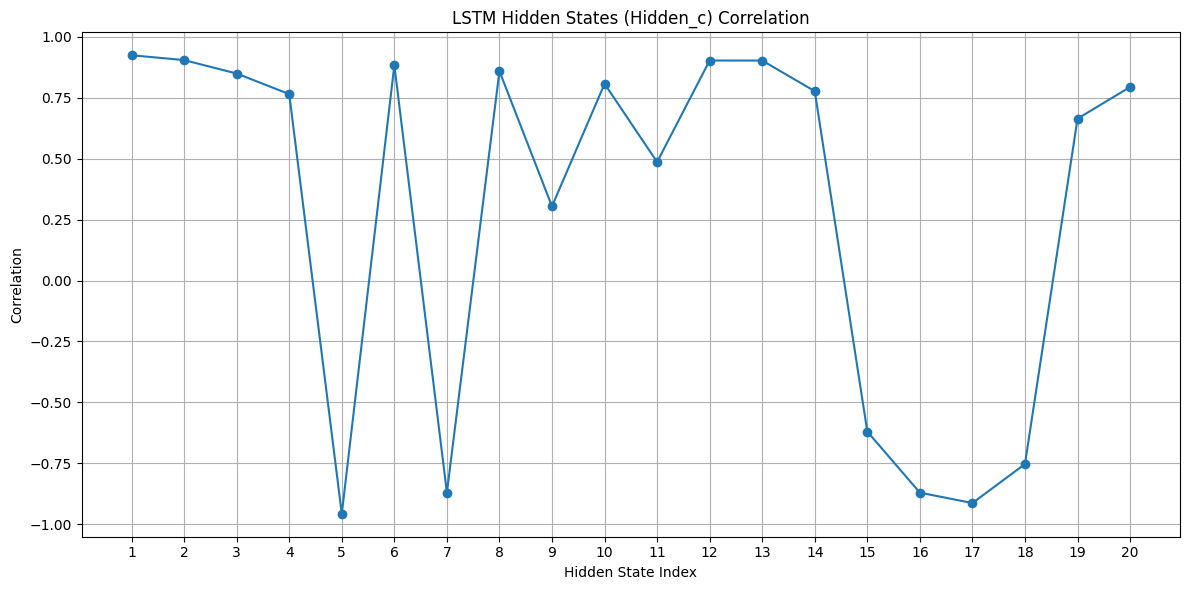

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Input
import matplotlib.pyplot as plt

# Generate data for the experiment (a simplified version)
def generate_data(num_samples):
    data = []
    labels = []
    for _ in range(num_samples):
        n = np.random.randint(5, 16)
        sequence = "a" * n + "b" * n
        data.append(sequence[:-1])
        labels.append(n)
    return data, labels

# Convert sequences to one-hot encoding
def sequences_to_one_hot(sequences, dict_size):
    max_sequence_length = len(max(sequences, key=len))
    results = np.zeros((len(sequences), max_sequence_length, dict_size), dtype=int)
    for i, sequence in enumerate(sequences):
        for t, char in enumerate(sequence):
            results[i, t, ord(char) - ord('a')] = 1
    return results

# Generate training data
num_samples = n
data, labels = generate_data(num_samples)
input_dict_size = 2  # 'a' and 'b'
data_one_hot = sequences_to_one_hot(data, input_dict_size)
labels = np.array(labels)

# Build and train RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(h, input_shape=(None, input_dict_size), return_sequences=True))
rnn_model.add(Dense(1, activation='linear'))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(data_one_hot, labels, epochs=e, batch_size=32, verbose=1)

# Build and train LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(h, input_shape=(None, input_dict_size), return_sequences=True))
lstm_model.add(Dense(1, activation='linear'))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(data_one_hot, labels, epochs=e, batch_size=32, verbose=1)

# Generate test data
test_data, test_labels = generate_data(100)
test_data_one_hot = sequences_to_one_hot(test_data, input_dict_size)
test_labels = np.array(test_labels)

# Extract hidden states and build a new model for RNN
rnn_input = Input(shape=(None, input_dict_size))
x, rnn_hidden_states = SimpleRNN(h, return_sequences=True, return_state=True)(rnn_input)
rnn_hidden_model = Model(rnn_input, rnn_hidden_states)
rnn_hidden_states = rnn_hidden_model.predict(test_data_one_hot)

# Extract hidden states and build a new model for LSTM
lstm_input = Input(shape=(None, input_dict_size))
x, lstm_hidden_h, lstm_hidden_c = LSTM(h, return_sequences=True, return_state=True)(lstm_input)
lstm_hidden_model = Model(lstm_input, [lstm_hidden_h, lstm_hidden_c])
lstm_hidden_states_h, lstm_hidden_states_c = lstm_hidden_model.predict(test_data_one_hot)

# Helper function to calculate, print and plot correlations
def plot_correlation(hidden_states, labels, title):
    correlations = [np.corrcoef(hidden_states[:, i], labels)[0, 1] for i in range(hidden_states.shape[1])]
    for i, correlation in enumerate(correlations, start=1):
        print(f"{title} - Hidden State {i}: {correlation}")

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(correlations)+1), correlations, marker='o')
    plt.xlabel('Hidden State Index')
    plt.ylabel('Correlation')
    plt.title(title)
    plt.grid(True)
    plt.xticks(range(1, len(correlations)+1))
    plt.tight_layout()
    plt.show()

# Calculate, print correlations, and plot
print("RNN Hidden States Correlation:")
plot_correlation(rnn_hidden_states, test_labels, 'RNN Hidden States Correlation')

print("\nLSTM Hidden States (Hidden_h) Correlation:")
plot_correlation(lstm_hidden_states_h, test_labels, 'LSTM Hidden States (Hidden_h) Correlation')

print("\nLSTM Hidden States (Hidden_c) Correlation:")
plot_correlation(lstm_hidden_states_c, test_labels, 'LSTM Hidden States (Hidden_c) Correlation')


In [8]:
n = 1000
h = 60
e = 60

Epoch 1/60
32/32 [==============================] - 1s 9ms/step - loss: 58.6479
Epoch 2/60
32/32 [==============================] - 0s 10ms/step - loss: 17.5409
Epoch 3/60
32/32 [==============================] - 0s 9ms/step - loss: 14.0820
Epoch 4/60
32/32 [==============================] - 0s 9ms/step - loss: 13.5480
Epoch 5/60
32/32 [==============================] - 0s 9ms/step - loss: 13.1745
Epoch 6/60
32/32 [==============================] - 0s 9ms/step - loss: 12.8827
Epoch 7/60
32/32 [==============================] - 0s 9ms/step - loss: 12.6473
Epoch 8/60
32/32 [==============================] - 0s 9ms/step - loss: 12.4474
Epoch 9/60
32/32 [==============================] - 0s 10ms/step - loss: 12.2601
Epoch 10/60
32/32 [==============================] - 0s 9ms/step - loss: 12.1019
Epoch 11/60
32/32 [==============================] - 0s 12ms/step - loss: 11.9622
Epoch 12/60
32/32 [==============================] - 0s 14ms/step - loss: 11.8436
Epoch 13/60
32/32 [==============

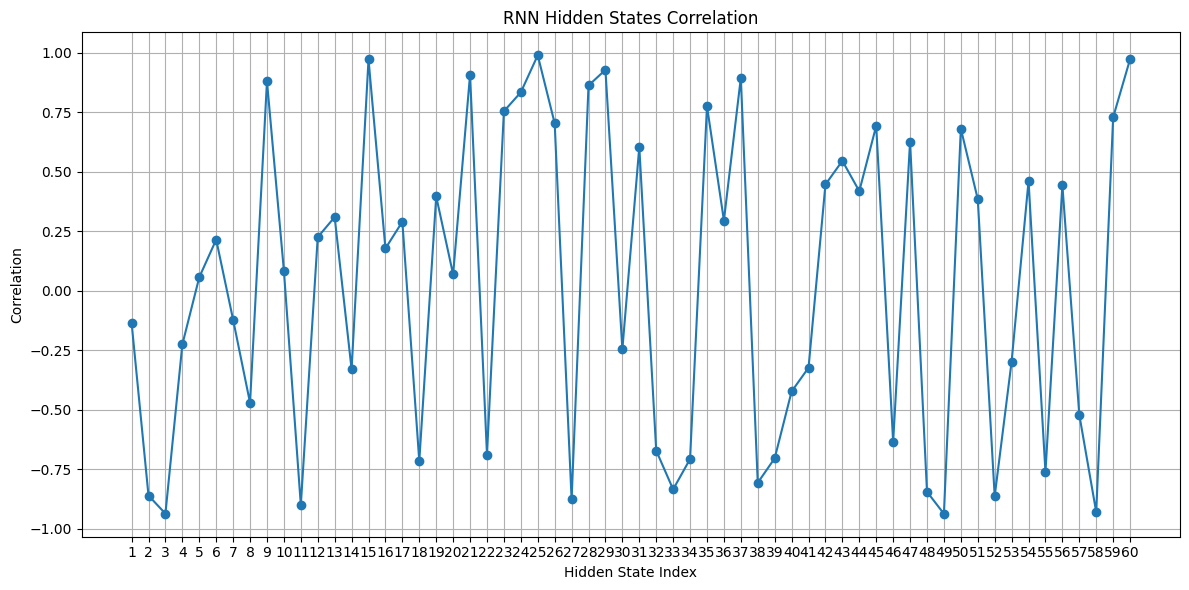


LSTM Hidden States (Hidden_h) Correlation:
LSTM Hidden States (Hidden_h) Correlation - Hidden State 1: 0.7737754674579039
LSTM Hidden States (Hidden_h) Correlation - Hidden State 2: -0.8389521980608823
LSTM Hidden States (Hidden_h) Correlation - Hidden State 3: -0.7851895459196083
LSTM Hidden States (Hidden_h) Correlation - Hidden State 4: -0.7424502964812943
LSTM Hidden States (Hidden_h) Correlation - Hidden State 5: 0.8022774803420718
LSTM Hidden States (Hidden_h) Correlation - Hidden State 6: -0.8496936748148692
LSTM Hidden States (Hidden_h) Correlation - Hidden State 7: -0.5896581362580544
LSTM Hidden States (Hidden_h) Correlation - Hidden State 8: -0.1624482341542092
LSTM Hidden States (Hidden_h) Correlation - Hidden State 9: -0.710764734379614
LSTM Hidden States (Hidden_h) Correlation - Hidden State 10: -0.9519719199198918
LSTM Hidden States (Hidden_h) Correlation - Hidden State 11: 0.7916316891407972
LSTM Hidden States (Hidden_h) Correlation - Hidden State 12: 0.524188473005844

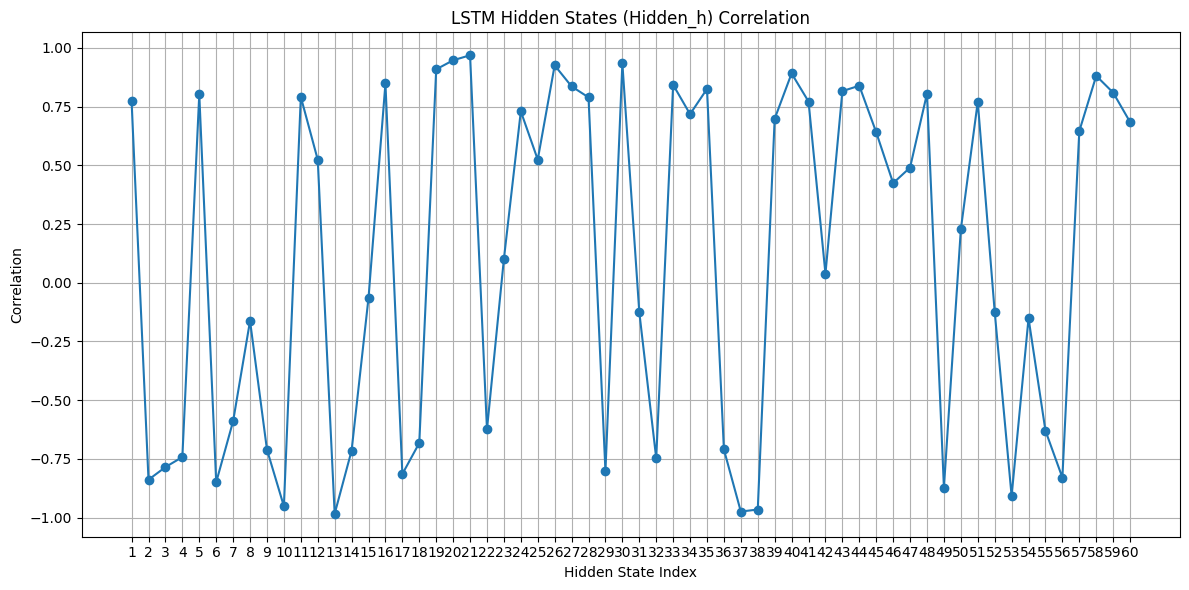


LSTM Hidden States (Hidden_c) Correlation:
LSTM Hidden States (Hidden_c) Correlation - Hidden State 1: 0.7804873551035972
LSTM Hidden States (Hidden_c) Correlation - Hidden State 2: -0.8319618792104974
LSTM Hidden States (Hidden_c) Correlation - Hidden State 3: -0.7866242917289171
LSTM Hidden States (Hidden_c) Correlation - Hidden State 4: -0.740277966235124
LSTM Hidden States (Hidden_c) Correlation - Hidden State 5: 0.7931051289664501
LSTM Hidden States (Hidden_c) Correlation - Hidden State 6: -0.8467854623276654
LSTM Hidden States (Hidden_c) Correlation - Hidden State 7: -0.5910444044586145
LSTM Hidden States (Hidden_c) Correlation - Hidden State 8: -0.1618837532993874
LSTM Hidden States (Hidden_c) Correlation - Hidden State 9: -0.7078379081457012
LSTM Hidden States (Hidden_c) Correlation - Hidden State 10: -0.9571209384528133
LSTM Hidden States (Hidden_c) Correlation - Hidden State 11: 0.7777726079681311
LSTM Hidden States (Hidden_c) Correlation - Hidden State 12: 0.522109642194427

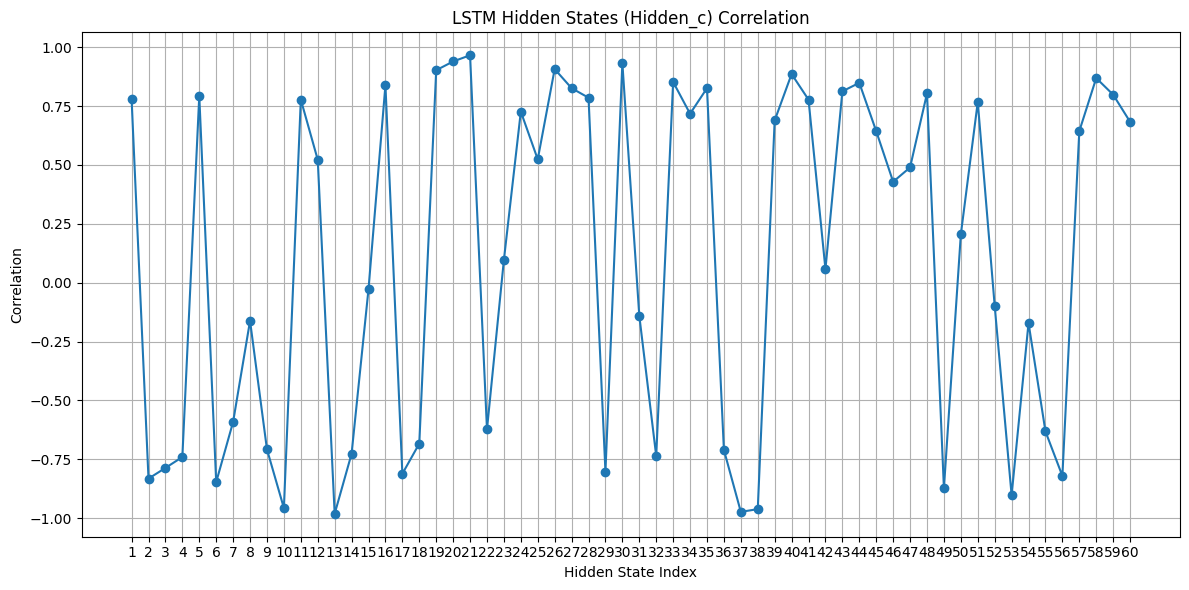

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Input
import matplotlib.pyplot as plt

# Generate data for the experiment (a simplified version)
def generate_data(num_samples):
    data = []
    labels = []
    for _ in range(num_samples):
        n = np.random.randint(5, 16)
        sequence = "a" * n + "b" * n
        data.append(sequence[:-1])
        labels.append(n)
    return data, labels

# Convert sequences to one-hot encoding
def sequences_to_one_hot(sequences, dict_size):
    max_sequence_length = len(max(sequences, key=len))
    results = np.zeros((len(sequences), max_sequence_length, dict_size), dtype=int)
    for i, sequence in enumerate(sequences):
        for t, char in enumerate(sequence):
            results[i, t, ord(char) - ord('a')] = 1
    return results

# Generate training data
num_samples = n
data, labels = generate_data(num_samples)
input_dict_size = 2  # 'a' and 'b'
data_one_hot = sequences_to_one_hot(data, input_dict_size)
labels = np.array(labels)

# Build and train RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(h, input_shape=(None, input_dict_size), return_sequences=True))
rnn_model.add(Dense(1, activation='linear'))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(data_one_hot, labels, epochs=e, batch_size=32, verbose=1)

# Build and train LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(h, input_shape=(None, input_dict_size), return_sequences=True))
lstm_model.add(Dense(1, activation='linear'))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(data_one_hot, labels, epochs=e, batch_size=32, verbose=1)

# Generate test data
test_data, test_labels = generate_data(100)
test_data_one_hot = sequences_to_one_hot(test_data, input_dict_size)
test_labels = np.array(test_labels)

# Extract hidden states and build a new model for RNN
rnn_input = Input(shape=(None, input_dict_size))
x, rnn_hidden_states = SimpleRNN(h, return_sequences=True, return_state=True)(rnn_input)
rnn_hidden_model = Model(rnn_input, rnn_hidden_states)
rnn_hidden_states = rnn_hidden_model.predict(test_data_one_hot)

# Extract hidden states and build a new model for LSTM
lstm_input = Input(shape=(None, input_dict_size))
x, lstm_hidden_h, lstm_hidden_c = LSTM(h, return_sequences=True, return_state=True)(lstm_input)
lstm_hidden_model = Model(lstm_input, [lstm_hidden_h, lstm_hidden_c])
lstm_hidden_states_h, lstm_hidden_states_c = lstm_hidden_model.predict(test_data_one_hot)

# Helper function to calculate, print and plot correlations
def plot_correlation(hidden_states, labels, title):
    correlations = [np.corrcoef(hidden_states[:, i], labels)[0, 1] for i in range(hidden_states.shape[1])]
    for i, correlation in enumerate(correlations, start=1):
        print(f"{title} - Hidden State {i}: {correlation}")

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(correlations)+1), correlations, marker='o')
    plt.xlabel('Hidden State Index')
    plt.ylabel('Correlation')
    plt.title(title)
    plt.grid(True)
    plt.xticks(range(1, len(correlations)+1))
    plt.tight_layout()
    plt.show()

# Calculate, print correlations, and plot
print("RNN Hidden States Correlation:")
plot_correlation(rnn_hidden_states, test_labels, 'RNN Hidden States Correlation')

print("\nLSTM Hidden States (Hidden_h) Correlation:")
plot_correlation(lstm_hidden_states_h, test_labels, 'LSTM Hidden States (Hidden_h) Correlation')

print("\nLSTM Hidden States (Hidden_c) Correlation:")
plot_correlation(lstm_hidden_states_c, test_labels, 'LSTM Hidden States (Hidden_c) Correlation')
